# IMDb India Movie Rating

**Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.**

In [1]:
# Importing warnings to prevent warnings from surfacing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary dependencies
import numpy as np
import pandas as pd

## Exploratory Data Analysis (EDA)

In [3]:
# Loading Dataset
df = pd.read_csv("C:/Users/uwaom/Desktop/IMDB MOVIES india/IMDb Movies India.csv", encoding='latin-1')

In [4]:
# Showing the first ten rows
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
# Showing the last ten rows
df.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,(1995),NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:
# Return the number of rows and columns in the dataset
df.shape

(15509, 10)

In [7]:
# Return the datatype of every row in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
# Provide statistical values
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [10]:
# Checking the duplicates by Name
df.duplicated(subset='Name').value_counts()


False    13838
True      1671
Name: count, dtype: int64

In [11]:
# Dropping all duplicates by Name column
df.drop_duplicates(subset="Name", inplace=True)
df.duplicated().value_counts()

False    13838
Name: count, dtype: int64

In [12]:
# Returns all missing values in each column
df.isnull().sum()

Name           0
Year         498
Duration    7239
Genre       1590
Rating      6685
Votes       6684
Director     465
Actor 1     1439
Actor 2     2132
Actor 3     2805
dtype: int64

In [13]:
df.drop(df.index[0])

df.set_index(np.arange(len(df)), inplace=True)

In [14]:
df.isnull().sum().sort_values()/len(df)

Name        0.000000
Director    0.033603
Year        0.035988
Actor 1     0.103989
Genre       0.114901
Actor 2     0.154069
Actor 3     0.202703
Votes       0.483018
Rating      0.483090
Duration    0.523125
dtype: float64

In [15]:
# Dropping null values
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

In [16]:
# Finding the percentage of missung values
df.isnull().sum().sort_values()/len(df)

Name        0.000000
Year        0.000000
Genre       0.000000
Director    0.036154
Actor 1     0.084953
Actor 2     0.118561
Actor 3     0.157770
Votes       0.400153
Rating      0.400238
Duration    0.462955
dtype: float64

In [17]:
# Changing the datatype for column 'Duration'
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

# Changing datatype with some string replacing
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [18]:
# Removing paranthesis 
df['Year'] = df['Year'].str.replace('(','').str.replace(')','')

In [19]:
# Replacing null values with the most frequent rating
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

# Replacing null values with average duration
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

# Replacing null values with average votes
df['Votes'].fillna(df['Votes'].mean(),inplace=True)

In [20]:
# Checking for missing values
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

## Visualization

In [21]:
# Importing Dependencies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

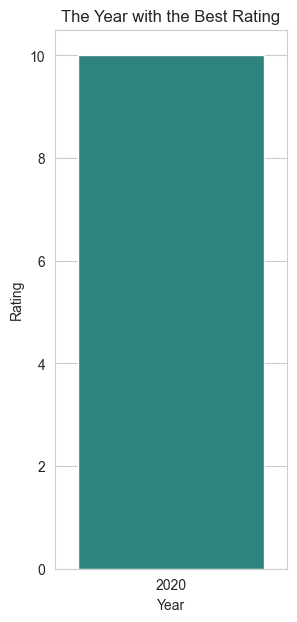

In [22]:
# Sorting the Year and Rating by Rating then selecting the first
best_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head(1)

plt.figure(figsize=(3,7))
sns.barplot(x='Year',y='Rating',data=best_rating, palette='viridis')

plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("The Year with the Best Rating")

'''plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')'''

plt.show()

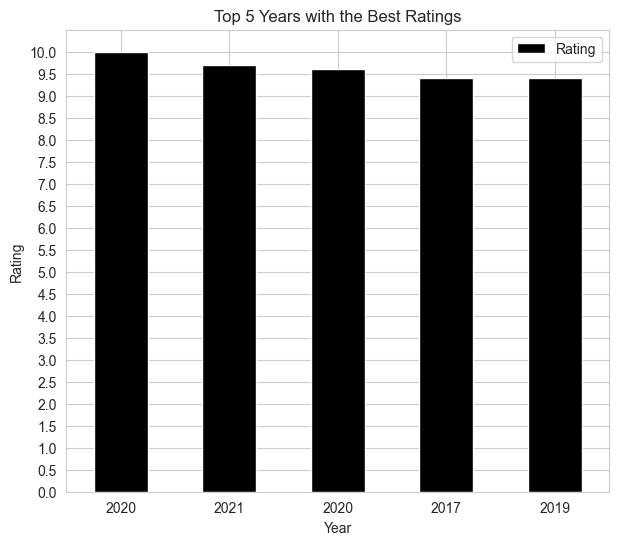

In [23]:
rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head()

rating.plot(figsize=(7,6), kind='bar',x='Year',y='Rating',color='black')

plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Top 5 Years with the Best Ratings")

plt.xticks(rotation=0)
plt.yticks(np.arange(0, 10.5, 0.5))

plt.show()
  

In [24]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.000000,"Drama, Musical",6.2,2033.216641,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.000000,Drama,6.2,2033.216641,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.000000,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
13833,Zulm Ko Jala Doonga,1988,127.374052,Action,4.6,11.000000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
13834,Zulmi,1999,129.000000,"Action, Drama",4.5,655.000000,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
13835,Zulmi Raj,2005,127.374052,Action,6.2,2033.216641,Kiran Thej,Sangeeta Tiwari,NaN,NaN
13836,Zulmi Shikari,1988,127.374052,Action,6.2,2033.216641,NaN,NaN,NaN,NaN


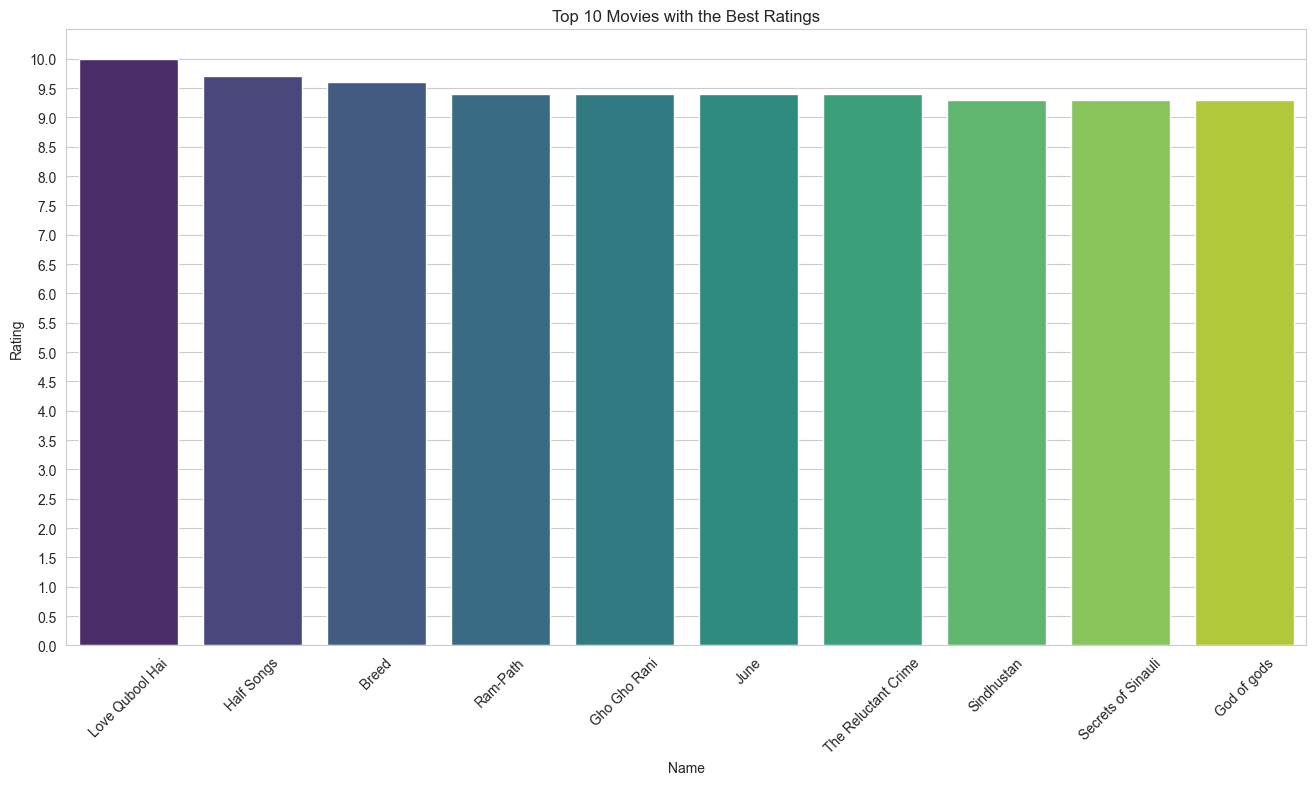

In [26]:
# Plotting for the Top 10 Movies with the Best Ratings
plt.figure(figsize=(16, 8))
# Using the sort_values method to sort movie names and Ratings
mov_rang= df[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)

sns.barplot(x="Name", y="Rating", data=mov_rang, palette='viridis')
plt.xlabel("Name")
plt.ylabel("Rating")
plt.title("Top 10 Movies with the Best Ratings")
plt.yticks(np.arange(0, 10.5, 0.5))
plt.xticks(rotation=45)
plt.show()

### Top 10 Actors with the most Appearance in Movies
**In every movie, there are more than 2 Actors featuring in a movie. In order to get the best ten; Column (Actor 1, Actor 2, Actor 3) with be combined.**

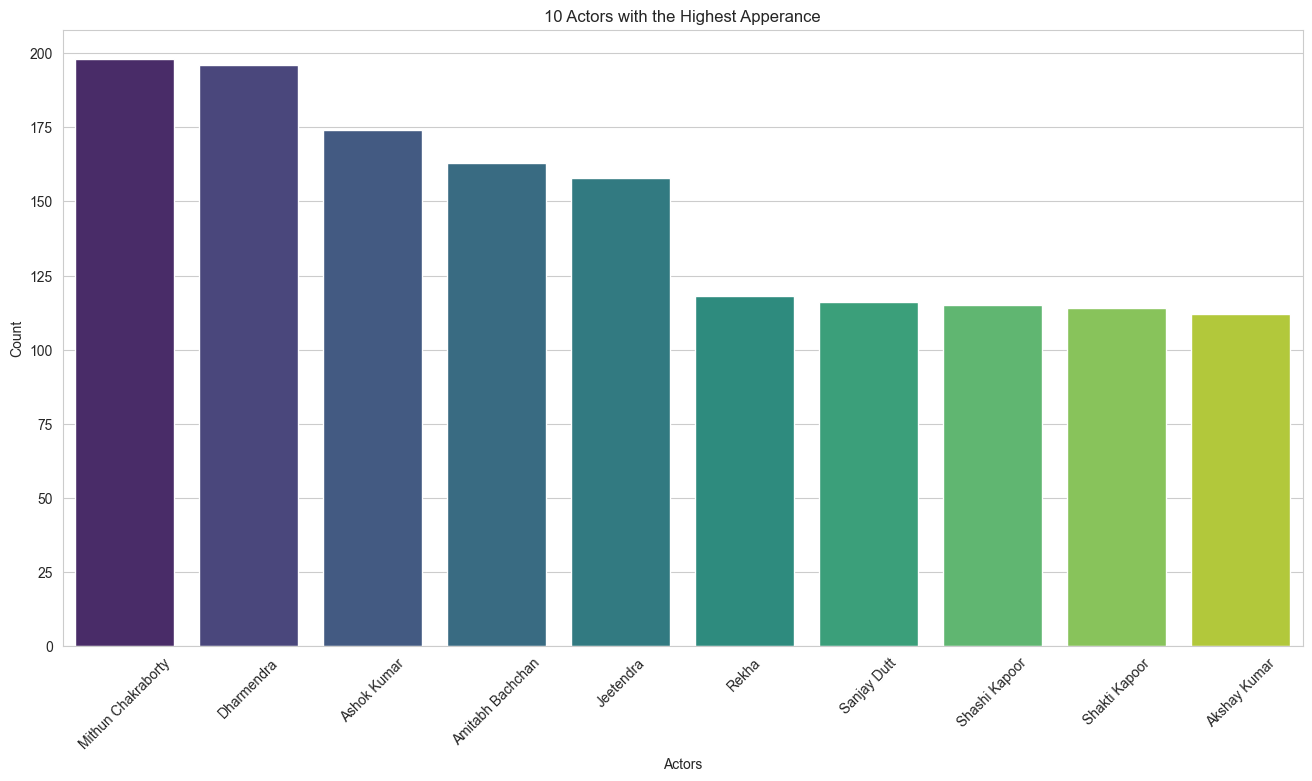

In [27]:
# Instantiating Actor 1, Actor 2 and Actor 3
col1 = df['Actor 1']
col2 = df['Actor 2']
col3 = df['Actor 3']

# Combinng all columns
col = pd.concat([col1, col2, col3])

final = col.value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(16, 8))
sns.barplot(x=final.index, y=final.values, palette='viridis')
plt.title("10 Actors with the Highest Apperance")
plt.xlabel("Actors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Checking for Genres and their Count
from collections import Counter

Genre = df['Genre']
Genre_counter = Counter(genre for row in Genre for genre in row.split(','))

print(Genre_counter.most_common(10))

Genres, count = zip(*Genre_counter.most_common(10))
if 'Drama' in Genres:
    i = Genres.index('Drama')
    Genres, count = Genres[:i] + Genres[i+1:], count[:i] + count[i+1:]


[('Drama', 3846), ('Action', 2988), (' Drama', 2433), (' Romance', 1485), ('Comedy', 1417), (' Thriller', 785), (' Crime', 766), ('Thriller', 698), (' Family', 659), ('Romance', 655)]


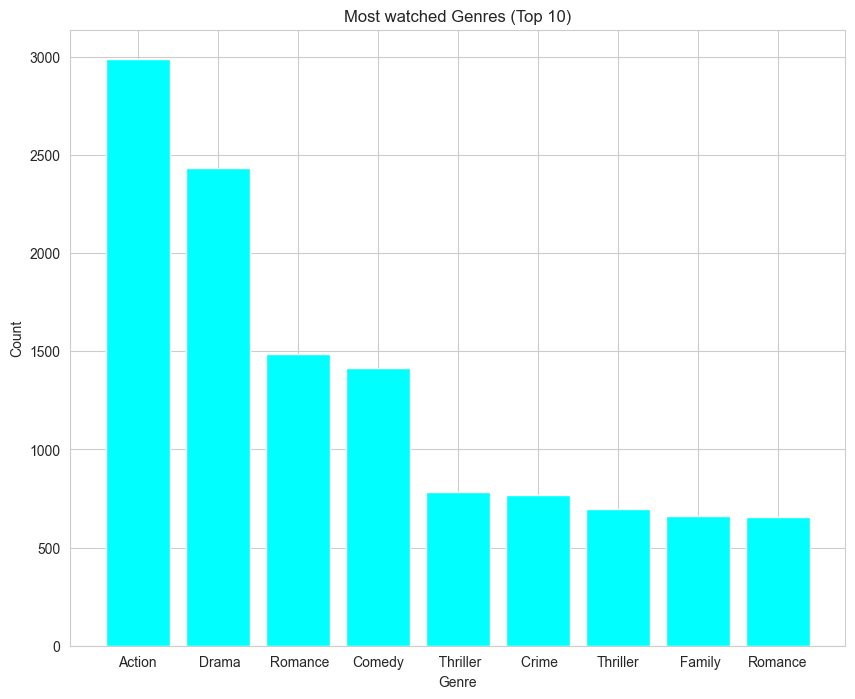

In [29]:
# Barplot showing Top 10 watched Genres
plt.figure(figsize=(10,8))
plt.bar(Genres, count, color='cyan')
plt.title('Most watched Genres (Top 10)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


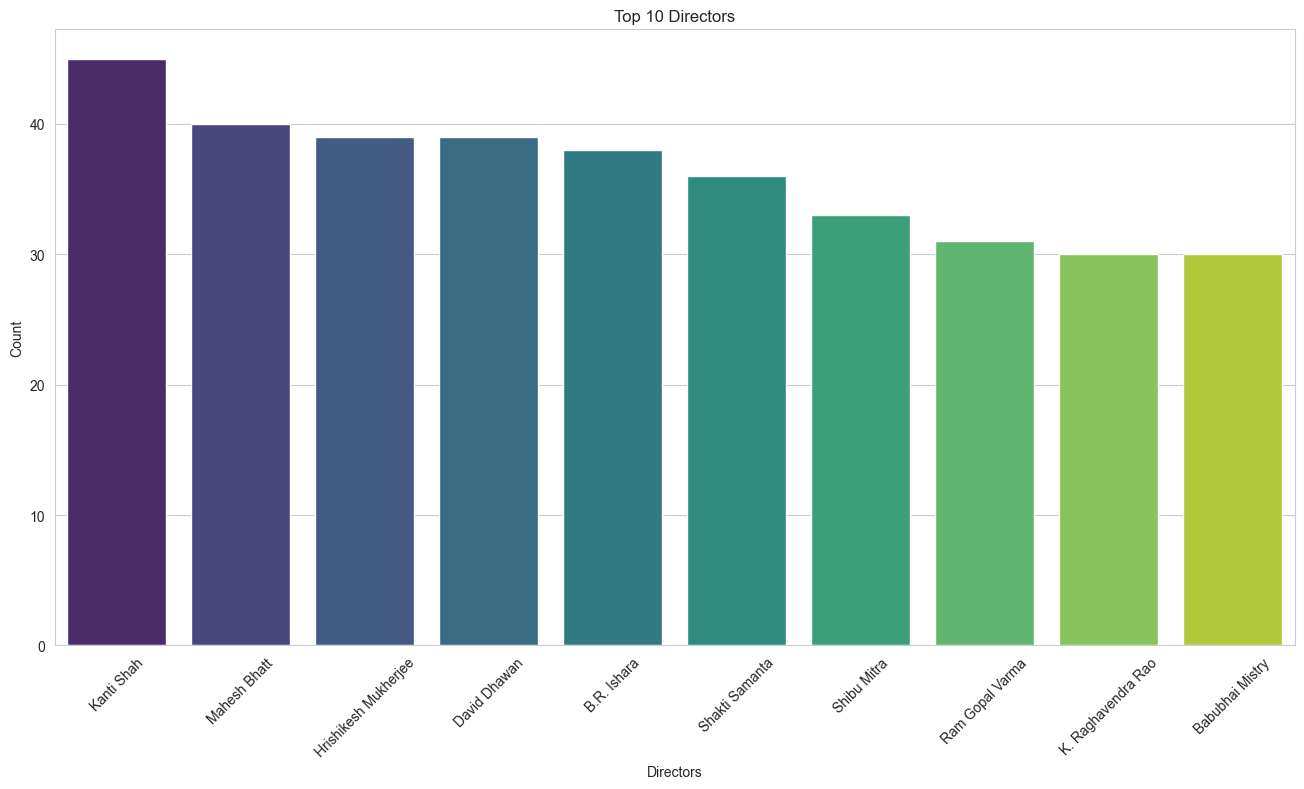

In [30]:
# Plot show the Top 10 Directors and how frequent they directed a movie
dir = df['Director']
top_dir = dir.value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(16, 8))
sns.barplot(x=top_dir.index, y=top_dir.values, palette='viridis')
plt.title("Top 10 Directors")
plt.xlabel("Directors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [31]:
# Dropping the Irrelevant column
df.drop(columns='Name', axis=1, inplace=True)

In [32]:
# Showing the first five rows
df.head(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,90.0,"Drama, Musical",6.2,2033.216641,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,105.0,Drama,6.2,2033.216641,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,1997,147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142.0,"Drama, Romance, War",7.4,1086.000000,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,2008,59.0,Documentary,6.2,2033.216641,Anirban Datta,NaN,NaN,NaN
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326.000000,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,2014,116.0,"Action, Crime, Thriller",4.0,11.000000,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,2004,96.0,Drama,6.2,17.000000,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni


In [34]:
# The new shape of the dataset
df.shape

(11783, 9)

## Feature Engineering

In [35]:
# Grouping the columns with the mean of the Rating column and then creating a new feature

genre_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_rating'] = genre_rating

director_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_rating'] = director_rating

actor1_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_rating'] = actor1_rating

actor2_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_rating'] = actor2_rating

actor3_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_rating'] = actor3_rating

In [36]:
df.head(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
1,2019,109.0,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.279575,7.000000,6.850000,7.000000,7.000000
2,2021,90.0,"Drama, Musical",6.2,2033.216641,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.383784,6.200000,6.600000,6.966667,6.200000
3,2019,110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.771756,4.400000,5.420000,4.400000,4.450000
4,2010,105.0,Drama,6.2,2033.216641,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.279575,6.283333,6.866667,5.844444,5.666667
5,1997,147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.172340,5.266667,4.973333,5.814286,5.942857
6,2005,142.0,"Drama, Romance, War",7.4,1086.000000,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.350000,7.500000,5.256522,6.050000,6.466667
7,2008,59.0,Documentary,6.2,2033.216641,Anirban Datta,NaN,NaN,NaN,6.662030,6.200000,NaN,NaN,NaN
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326.000000,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.576923,5.600000,5.600000,5.883333,5.600000
9,2014,116.0,"Action, Crime, Thriller",4.0,11.000000,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,5.305172,4.000000,4.000000,4.550000,4.000000
10,2004,96.0,Drama,6.2,17.000000,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.279575,6.200000,5.454545,5.710000,5.475000


In [37]:
# Checking for the datatype of all the columnns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11783 entries, 1 to 13837
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             11783 non-null  object 
 1   Duration         11783 non-null  float64
 2   Genre            11783 non-null  object 
 3   Rating           11783 non-null  float64
 4   Votes            11783 non-null  float64
 5   Director         11357 non-null  object 
 6   Actor 1          10782 non-null  object 
 7   Actor 2          10386 non-null  object 
 8   Actor 3          9924 non-null   object 
 9   Genre_rating     11783 non-null  float64
 10  Director_rating  11357 non-null  float64
 11  Actor1_rating    10782 non-null  float64
 12  Actor2_rating    10386 non-null  float64
 13  Actor3_rating    9924 non-null   float64
dtypes: float64(8), object(6)
memory usage: 1.3+ MB


In [38]:
# Checking column 'Year'
df['Year']

1        2019
2        2021
3        2019
4        2010
5        1997
         ... 
13833    1988
13834    1999
13835    2005
13836    1988
13837    1998
Name: Year, Length: 11783, dtype: object

In [39]:
# Converting the column 'Year' from object datatype to integer
df['Year'] = df['Year'].astype(int)

In [40]:
# Checking the datatype of column 'Year'
df['Year'].dtype

dtype('int32')

In [41]:
# Dropping all missing values
df.dropna(inplace=True)

## Encoding Categorical Values and Feature Scaling

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
# Initializing the LabelEncoder with lb
lb = LabelEncoder()

In [44]:
df['Year'] = lb.fit_transform(df['Year'])

In [45]:
df.drop(columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis = 1, inplace=True)

In [46]:
df.head(10)

,Year,Duration,Rating,Votes,Genre_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
1,90,109.0,7.0,8.000000,6.279575,7.000000,6.850000,7.000000,7.000000
2,92,90.0,6.2,2033.216641,6.383784,6.200000,6.600000,6.966667,6.200000
3,90,110.0,4.4,35.000000,5.771756,4.400000,5.420000,4.400000,4.450000
4,81,105.0,6.2,2033.216641,6.279575,6.283333,6.866667,5.844444,5.666667
5,68,147.0,4.7,827.000000,6.172340,5.266667,4.973333,5.814286,5.942857
6,76,142.0,7.4,1086.000000,7.350000,7.500000,5.256522,6.050000,6.466667
8,83,82.0,5.6,326.000000,5.576923,5.600000,5.600000,5.883333,5.600000
9,85,116.0,4.0,11.000000,5.305172,4.000000,4.000000,4.550000,4.000000
10,75,96.0,6.2,17.000000,6.279575,6.200000,5.454545,5.710000,5.475000
11,87,120.0,5.9,59.000000,5.503663,6.700000,5.937500,5.900000,5.900000


In [47]:
# Scaling Features
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [48]:
# Converting df from numpy array back to dataframe 
df = pd.DataFrame(df, columns=['Year','Duration','Rating','Votes','Genre_rating','Director_rating','Actor1_rating','Actor2_rating','Actor3_rating'])

In [49]:
# Returns the first 10 rows of the dataset
df.head(10)

,Year,Duration,Rating,Votes,Genre_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
0,1.215509,-0.976368,0.920050,-0.202419,0.796932,1.216698,1.117474,1.286362,1.266682
1,1.308470,-1.895755,0.226217,-0.004941,1.057206,0.294558,0.809401,1.245862,0.311446
2,1.215509,-0.927979,-1.334906,-0.199786,-0.471414,-1.780256,-0.644706,-1.872604,-1.778133
3,0.797183,-1.169923,0.226217,-0.004941,0.796932,0.390614,1.138013,-0.117623,-0.325378
4,0.192934,0.862406,-1.074718,-0.122559,0.529099,-0.781272,-1.195130,-0.154266,0.004405
5,0.564780,0.620462,1.266966,-0.097304,3.470457,1.793035,-0.846159,0.132124,0.629858
6,0.890144,-2.282865,-0.294157,-0.171411,-0.958034,-0.397047,-0.422893,-0.070374,-0.404981
7,0.983106,-0.637646,-1.681822,-0.202127,-1.636767,-2.241326,-2.394563,-1.690356,-2.315454
8,0.518299,-1.605422,0.226217,-0.201542,0.796932,0.294558,-0.602136,-0.280972,-0.554237
9,1.076067,-0.444091,-0.033970,-0.197446,-1.141011,0.870895,-0.006994,-0.050124,-0.046768


## Assigning Features and Target

In [50]:
# Assigning Features to Variable X and Target to Variable y
X = df.drop(['Rating'], axis=1)
y = df['Rating']

In [51]:
# Checking the first 5 rows of the Features
X.head()

,Year,Duration,Votes,Genre_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
0,1.215509,-0.976368,-0.202419,0.796932,1.216698,1.117474,1.286362,1.266682
1,1.308470,-1.895755,-0.004941,1.057206,0.294558,0.809401,1.245862,0.311446
2,1.215509,-0.927979,-0.199786,-0.471414,-1.780256,-0.644706,-1.872604,-1.778133
3,0.797183,-1.169923,-0.004941,0.796932,0.390614,1.138013,-0.117623,-0.325378
4,0.192934,0.862406,-0.122559,0.529099,-0.781272,-1.195130,-0.154266,0.004405


In [52]:
# Checking the first 5 rows of the Target
y.head()

0    0.920050
1    0.226217
2   -1.334906
3    0.226217
4   -1.074718
Name: Rating, dtype: float64

## Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Splitting into Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [55]:
X_train.head()

,Year,Duration,Votes,Genre_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
3266,0.704222,0.572073,-0.004941,-0.291744,0.294558,0.316483,0.314372,0.311446
7487,1.169028,-0.589258,-0.037628,0.419780,-0.339413,0.070025,0.415621,0.430850
6886,1.076067,-1.169923,-0.004941,0.796932,0.294558,0.316483,0.314372,0.311446
9113,0.146453,-1.073145,-0.196179,3.495433,0.390614,0.624557,0.522655,1.505491
8578,-0.318353,-0.087270,-0.195106,0.796932,2.023570,1.240704,2.136852,0.908468


In [56]:
X_test.head()

,Year,Duration,Votes,Genre_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
7841,-1.433889,-0.087270,-0.004941,0.796932,0.294558,0.334740,0.314372,0.450751
1559,-1.480370,-0.087270,-0.004941,-0.291744,0.294558,0.116236,0.192873,0.218575
1985,-0.550757,-0.087270,-0.202614,0.796932,0.409825,0.337022,2.501348,0.759212
5909,-1.805735,-0.087270,-0.202517,1.305844,0.208107,0.809401,0.449371,0.311446
121,1.122548,0.765628,0.306484,-1.412731,0.709521,0.760109,-0.244522,-0.524386


In [57]:
y_train.head()

3266    0.226217
7487   -0.120699
6886    0.226217
9113    1.093508
8578    1.527153
Name: Rating, dtype: float64

In [58]:
y_test.head()

7841    0.226217
1559    0.226217
1985    1.787340
5909    1.266966
121     0.226217
Name: Rating, dtype: float64

## Model Selection and Training

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [61]:
# Train and evaluate the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Iterates through the dictionary of models to Fit, Predict, and Print Performance Results 
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("\n")

Linear Regression Performance:
Mean Absolute Error: 0.37
Mean Squared Error: 0.29
R-squared: 0.72


Decision Tree Regressor Performance:
Mean Absolute Error: 0.39
Mean Squared Error: 0.44
R-squared: 0.57


Random Forest Regressor Performance:
Mean Absolute Error: 0.28
Mean Squared Error: 0.22
R-squared: 0.79




### From the above Performance Metrics, the Best Performing Model is Random Forest Regressor with R-Squared of 0.79